In [1]:
import mne
import os
import autoreject as aj
import numpy as np
import pandas as pd
from pathlib import Path

DATA_PATH = Path(os.getenv("DATA_PATH"))

In [2]:
path = DATA_PATH / "prp/post_ica"
out_path = DATA_PATH / "prp/epoched"
subj_names = []

for file in path.glob("*"):
    if 'raw.fif' in file.name:
        subj_names.append(file.name.split('_')[2])

print(subj_names)

['VP6', 'VP8', 'VP5', 'VP3', 'VP24', 'VP13', 'VP16', 'VP11', 'VP23', 'VP21', 'VP18', 'VP10', 'VP19', 'VP17', 'VP15', 'VP9', 'VP7', 'VP22', 'VP20', 'VP1', 'VP12', 'VP14', 'VP2']


In [3]:
raw = mne.io.read_raw_fif(path / f"post_ica_VP1_raw.fif", preload=True, verbose=False)

In [4]:
epochs, events = create_epochs_t1(-.25, 2, raw)

NameError: name 'create_epochs_t1' is not defined

<Axes: xlabel='rt', ylabel='Count'>

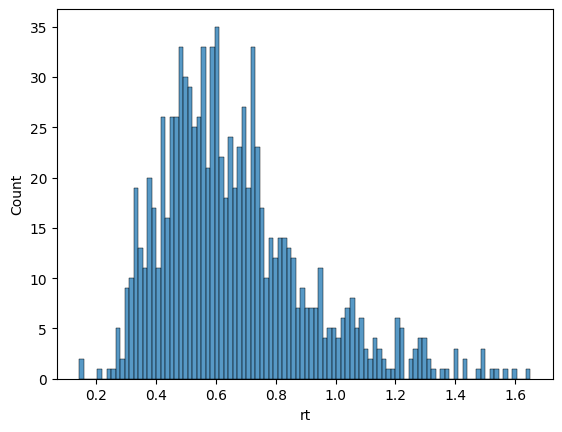

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(epochs.metadata.rt, bins=100)


In [8]:
events, metadata, s1_indices, _ = get_events(raw, -.25, 2)

Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
5399 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 18 64]


In [9]:
metadata


,event_name,condition/short,condition/long,stimulus/t1,stimulus/t2,response/t2,response/t1,condition,first_condition,valid,trial_index
0,stimulus/t1,NaN,0.000000,0.000000,1.197266,1.734375,1.406250,0.000000,long,True,0
1,stimulus/t2,NaN,1.667969,1.667969,0.000000,0.537109,0.208984,1.667969,long,True,0
2,stimulus/t1,NaN,0.000000,0.000000,1.177734,1.757812,0.685547,0.000000,long,True,1
3,stimulus/t2,1.689453,NaN,1.689453,0.000000,0.580078,NaN,1.689453,long,True,1
4,stimulus/t1,0.000000,NaN,0.000000,0.275391,0.810547,0.537109,0.000000,short,True,2
...,...,...,...,...,...,...,...,...,...,...,...
2136,stimulus/t2,NaN,1.388672,1.388672,0.000000,0.273438,1.705078,1.388672,long,True,1076
2137,stimulus/t1,NaN,0.000000,0.000000,1.177734,1.564453,0.316406,0.000000,long,True,1077
2138,stimulus/t2,1.488281,NaN,1.488281,0.000000,0.386719,1.962891,1.488281,long,True,1077
2139,stimulus/t1,0.000000,NaN,0.000000,0.277344,0.937500,0.474609,0.000000,short,True,1078


In [ ]:
# def create_epochs_t1(tmin, tmax, raw):
#     events, metadata, s1_indices, _ = get_events(raw, tmin, tmax)
#     metadata = metadata.iloc[s1_indices]
#     # events = events[s1_indices]
#     events = [events[i] for i in s1_indices]
    
#     keep_cols = ['response/t1', 'first_condition', 'trial_index']
#     metadata = metadata[keep_cols]
#     metadata.reset_index(drop=True, inplace=True) # This allows to preserve the trial number after the rejections performed by the mne.Epochs function
#     metadata.columns = ['rt', 'condition', 'trial_index'] # More convenient names

#     event_id = {'stimulus/t1': 11} # S1 will be the onset of the epochs

#     # Create epochs
#     epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
#                 baseline=(None, 0), preload=True, 
#                 verbose=True, detrend=1, on_missing = 'warn', event_repeated='drop',
#                 metadata=metadata, reject_by_annotation=True, reject=None)
    
#     return epochs, events

In [ ]:
# def create_epochs_t2(tmin, tmax, raw):
#     events, metadata, s1_indices, s2_indices = get_events(raw, tmin, tmax)
#     metadata_2 = metadata.iloc[s1_indices]
#     metadata = metadata.iloc[s2_indices]
#     events = [events[i] for i in s2_indices]
    
#     # Move up RTs of S2 based on short/long SOA because they are originally based on S1
#     metadata_2['response/t2'] = np.where(metadata_2['first_condition']=='short', metadata_2['response/t2']-0.3, metadata_2['response/t2']-1.2)
#     metadata['response/t2'] = metadata['response/t2'] - 0.024
#     metadata.reset_index(drop=True, inplace=True)
#     metadata_2.reset_index(drop=True, inplace=True)

#     # Create a mapping from trial_index to first_condition from metadata_2 and update first_condition column in metadata only where trial_index matches
#     update_map = metadata_2.set_index('trial_index')['first_condition']
#     metadata['first_condition'] = metadata['trial_index'].map(update_map).fillna(metadata['first_condition'])

#     update_map = metadata_2.set_index('trial_index')['response/t2']
#     metadata['response/t2'] = metadata['trial_index'].map(update_map).fillna(metadata['response/t2'])
    
#     keep_cols = ['response/t2', 'first_condition', 'trial_index']
#     metadata = metadata[keep_cols]
#     metadata.reset_index(drop=True, inplace=True) # This allows to preserve the trial number after the rejections performed by the mne.Epochs function
#     metadata.columns = ['rt', 'condition', 'trial_index'] # More convenient names

#     event_id = {'stimulus/t2': 64} # S2 will be the onset of the epochs

#     # Create epochs
#     epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
#                 baseline=(None, 0), preload=True, 
#                 verbose=True, detrend=1, on_missing = 'warn', event_repeated='drop',
#                 metadata=metadata, reject_by_annotation=True, reject=None)
    
#     return epochs, events

In [ ]:
# def create_epochs_trial(tmin, tmax, raw):
#     events, metadata, s1_indices, _ = get_events(raw, tmin, tmax)
#     metadata = metadata.iloc[s1_indices]
#     # events = events[s1_indices]
#     events = [events[i] for i in s1_indices]
    
#     keep_cols = ['response/t2', 'first_condition', 'trial_index']
#     metadata = metadata[keep_cols]
#     metadata.reset_index(drop=True, inplace=True) # This allows to preserve the trial number after the rejections performed by the mne.Epochs function
#     metadata.columns = ['rt', 'condition', 'trial_index'] # More convenient names

#     event_id = {'stimulus/t1': 11} # S1 will be the onset of the epochs

#     # Create epochs
#     epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
#                 baseline=(None, 0), preload=True, 
#                 verbose=True, detrend=1, on_missing = 'warn', event_repeated='drop',
#                 metadata=metadata, reject_by_annotation=True, reject=None)
    
#     return epochs, events

In [3]:
def autoreject(epochs, raw):
    picks = mne.pick_types(raw.info, eeg=False, stim=False, eog=False, include=['C3', 'C4', 'POz', 'FCz'], exclude=[])
    ar = aj.AutoReject()
    
    # Fit on the first 20 epochs to save time
    ar.fit(epochs[0:20])
    epochs_ar, reject_log = ar.transform(epochs, return_log=True)

    return epochs_ar

In [4]:
# Given a tuple of ndarrays (index 0 containing event, index 1 containing time)
# Return fixed events
def merge_events_stim(stim):
    stim_new = stim[0].copy()
    mapping = {
        # stim/t1
        12: 11,
        20: 11,
        21: 11,
        22: 11,
        23: 11,
        31: 11,
        32: 11,
        # stim/t2
        65: 64,
        66: 64,
        67: 64,
        68: 64,
        128: 64,
        129: 64,
        130: 64,
        131: 64,
        132: 64,
        133: 64,
        # response/t1
        2: 1,
        3: 1,
        # response/t2
        5: 4,
        # block
        7: 6,
    }
    for k, v in mapping.items():
        stim_new[stim[0] == k] = v
    return stim_new


def find_condition(events):
    # If stim_t2 occurs within 300 or 1200ms from stim_t1, include condition
    # Otherwise exclude that stim_t1 timepoint
    new_events = []
    
    stims_t1 = events[events[:, 2] == 11, 0]
    stims_t2 = events[events[:, 2] == 64, 0]

    # Identify short/long SOA based on time between stims
    for idx, onset in enumerate(stims_t1):
        diffs = stims_t2[stims_t2 > onset] - onset
        # diffs[0] is distance (in samples?) to closest t2 stim
        if 600 < diffs[0] < 615:  # Most often 602/603
            # Long SOA
            new_events.append([onset, 0, 256])
        elif 140 < diffs[0] < 151:  # Most often 141/142/143
            # Short SOA
            new_events.append([onset, 0, 512])
        else:
            # Invalid
            new_events.append([onset, 0, 1024])
    return new_events


def get_events(raw, tmin, tmax):
    stimulus_id = {"stimulus/t1": 11, "stimulus/t2": 64}  # Stimulus trigger
    condition_id = {"condition/short": 512, "condition/long": 256}  # Condition trigger
    response_id = {"response/t2": 4, "response/t1": 1}  # Response triggers
    event_id = condition_id | stimulus_id | response_id  # All retained events

    # Correct event trigger values in raw data
    stim_idx = raw.ch_names.index("Status")
    raw._data[stim_idx] = merge_events_stim(raw["Status"])

    # IMPORTANT, set consecutive=True so not only ascending trigger values are recorded as new events
    events = mne.find_events(raw, shortest_event=1, consecutive=True)

    # find_condition adds condition trigger
    new_events = np.array(find_condition(events))
    # 1, 4, 6, 11, 16, 64

    # Append events to end of array, now has events 256/512 at same onset, but later in array
    events_tmp = np.concatenate((events, new_events))

    # Makes for every event in row_events (11/64, stim/t1 and stim/t2)
    # a row containing all other events (condition, response)
    metadata, events, event_id = mne.epochs.make_metadata(
        events=events_tmp,
        event_id=event_id,
        tmin=tmin,
        tmax=tmax,
        sfreq=raw.info["sfreq"],
        row_events=list(stimulus_id.keys()),
        keep_first=["condition"],
    )
    # keep_first causes first_condition to be set for stim/t2 based on the NEXT trial
    # if 'condition' is not 0 (condition was not set at the same time as event), set first_condition to shift(1) value (previous row)
    metadata.loc[(metadata['condition'] != 0), 'first_condition'] = metadata['first_condition'].shift(1)

    # Trial is valid if first_condition is not None AND response/t1 is not NaN AND response/t2 is not NaN, in these cases we know that there was ~300/1200ms between stimuli and responses were given in the time between stim/t1 and next stim/t1
    metadata.loc[metadata["event_name"] == "stimulus/t1", "valid"] = (
        metadata["first_condition"].notna()
        & metadata["response/t1"].notna()
        & metadata["response/t2"].notna()
    )

    # t2 'trials' are valid when the previous row was stim/t1 and it was valid, AND response/t2 is not na
    metadata.loc[metadata["event_name"] == "stimulus/t2", "valid"] = (
        (metadata["event_name"].shift(1) == "stimulus/t1")
        & (metadata["valid"].shift(1) == True)
        & (metadata["response/t2"].notna())
    )

    metadata = metadata.reset_index(drop=True)

    trial_index = 0
    # Assign trial index to each row, the same number for every stimulus/t1 that is followed by a stimulus/t2
    for row in metadata.itertuples():
        if row.event_name == "stimulus/t1":
            metadata.at[row.Index, "trial_index"] = trial_index
            trial_index += 1
        elif row.event_name == "stimulus/t2":
            if metadata.at[row.Index - 1, "event_name"] == "stimulus/t1":
                metadata.at[row.Index, "trial_index"] = trial_index - 1
            else:
                metadata.at[row.Index, "trial_index"] = trial_index
                trial_index += 1
    metadata['trial_index'] = metadata.trial_index.astype(int)

    # find stim/t1 and stim/t2 indices
    s1_indices = metadata[(metadata["event_name"] == "stimulus/t1") & (metadata["valid"] == True)].index.tolist()
    s2_indices = metadata[(metadata["event_name"] == "stimulus/t2") & (metadata["valid"] == True)].index.tolist()

    return events, metadata, s1_indices, s2_indices

In [5]:
def create_epochs_t1(tmin, tmax, raw):
    events, metadata, s1_indices, _ = get_events(raw, tmin, tmax)

    s1_indices = [i for i in s1_indices]

    metadata = metadata.iloc[s1_indices]
    events = [events[i] for i in s1_indices]
    keep_cols = ['response/t1', 'first_condition', 'trial_index', 'stimulus/t2']
    metadata = metadata[keep_cols]
    metadata.reset_index(drop=True, inplace=True) # This allows to preserve the trial number after the rejections performed by the mne.Epochs function
    metadata.columns = ['rt', 'condition', 'trial_index', 'interval'] # More convenient names
    event_id = {'stimulus/t1': 11} # S1 will be the onset of the epochs
    
    # Create epochs
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                baseline=(None, 0), preload=True, 
                verbose=True, detrend=1, on_missing = 'warn', event_repeated='drop',
                metadata=metadata, reject_by_annotation=True, reject=None)
    
    return epochs, events


In [6]:
def create_epochs_t2(tmin, tmax, raw):
    events, metadata, _, s2_indices = get_events(raw, tmin, tmax)

    s2_indices = [i for i in s2_indices]

    metadata = metadata.iloc[s2_indices]
    events = [events[i] for i in s2_indices]
    keep_cols = ['response/t2', 'first_condition', 'trial_index']
    metadata = metadata[keep_cols]
    metadata.reset_index(drop=True, inplace=True) # This allows to preserve the trial number after the rejections performed by the mne.Epochs function
    metadata.columns = ['rt', 'condition', 'trial_index'] # More convenient names
    event_id = {'stimulus/t2': 64} # S1 will be the onset of the epochs
    
    # Create epochs
    epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False,
                baseline=(None, 0), preload=True, 
                verbose=True, detrend=1, on_missing = 'warn', event_repeated='drop',
                metadata=metadata, reject_by_annotation=True, reject=None)
    
    return epochs, events

In [7]:
tmin = -0.25
tmax = 2
for subj in subj_names[1:]:
    print(f'Processing {subj}')
    raw = mne.io.read_raw_fif(path / f"post_ica_{subj}_raw.fif", preload=True, verbose=False)
    # events, metadata, _, s2_indices = get_events(raw, tmin, tmax)
    # epochs, events_crt = create_epochs_t1(tmin, tmax, raw)
    # epochs_t2, events_crt_t2 = create_epochs_t2(tmin, tmax, raw)

    # stimulus/t1 > response/t1
    epochs, events = create_epochs_t1(tmin, tmax, raw)
    epochs = autoreject(epochs, raw)
    epochs.save(out_path / f"{subj}-t1-epo.fif", overwrite=True)

    # stimulus/t2 > response/t2
    epochs, events = create_epochs_t2(tmin, tmax, raw) 
    epochs = autoreject(epochs, raw)
    epochs.save(out_path / f"{subj}-t2-epo.fif", overwrite=True)

    # TODO: Implement stimulus/t1 > response/t2

Processing VP8
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
5944 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1152 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1152 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.90 and n_interpolate=32


  0%|          | Repairing epochs : 0/1152 [00:00<?,       ?it/s]

Dropped 21 epochs: 12, 25, 95, 320, 793, 918, 1018, 1021, 1022, 1068, 1071, 1072, 1094, 1095, 1120, 1121, 1130, 1140, 1141, 1142, 1147
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
5944 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1151 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1151 events and 1153 original time points ...
7 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1144 [00:00<?,       ?it/s]

Dropped 124 epochs: 7, 12, 25, 35, 38, 57, 62, 94, 95, 99, 106, 158, 163, 171, 175, 198, 202, 254, 260, 261, 263, 277, 288, 300, 307, 308, 314, 317, 319, 320, 323, 349, 352, 365, 370, 388, 416, 432, 449, 452, 462, 467, 468, 486, 487, 511, 515, 518, 584, 604, 605, 612, 616, 620, 621, 622, 640, 659, 665, 683, 688, 726, 787, 788, 789, 810, 830, 831, 835, 836, 846, 850, 870, 896, 904, 911, 912, 913, 914, 915, 972, 1010, 1011, 1014, 1015, 1016, 1020, 1022, 1039, 1042, 1043, 1063, 1064, 1065, 1074, 1078, 1086, 1087, 1088, 1089, 1091, 1092, 1093, 1095, 1099, 1103, 1107, 1108, 1109, 1112, 1113, 1114, 1117, 1122, 1123, 1126, 1130, 1132, 1133, 1134, 1135, 1136, 1137, 1139
Processing VP5
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6473 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1229 matching events found
Setting bas

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1229 [00:00<?,       ?it/s]

Dropped 43 epochs: 23, 28, 43, 45, 55, 56, 57, 61, 62, 64, 67, 79, 81, 85, 91, 127, 129, 140, 141, 148, 152, 155, 157, 158, 159, 172, 184, 192, 219, 239, 240, 250, 266, 290, 303, 351, 465, 473, 494, 580, 593, 690, 1012
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6473 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1229 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1229 events and 1153 original time points ...
4 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1225 [00:00<?,       ?it/s]

Dropped 35 epochs: 23, 42, 43, 45, 55, 56, 61, 62, 63, 67, 79, 81, 84, 91, 127, 132, 140, 147, 152, 155, 157, 158, 159, 172, 184, 216, 217, 218, 237, 288, 301, 315, 349, 463, 1008
Processing VP3
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6495 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1231 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1231 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1231 [00:00<?,       ?it/s]

Dropped 21 epochs: 23, 97, 240, 351, 352, 372, 411, 430, 445, 534, 658, 684, 692, 738, 777, 859, 1001, 1085, 1125, 1148, 1169
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6495 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1231 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1231 events and 1153 original time points ...
7 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1224 [00:00<?,       ?it/s]

Dropped 21 epochs: 23, 97, 238, 349, 370, 408, 426, 427, 442, 469, 597, 654, 688, 733, 771, 772, 853, 995, 1079, 1119, 1142
Processing VP24
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6470 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1239 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1239 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=32


  0%|          | Repairing epochs : 0/1239 [00:00<?,       ?it/s]

Dropped 41 epochs: 37, 90, 92, 168, 171, 172, 191, 202, 205, 206, 285, 286, 304, 358, 398, 490, 491, 562, 563, 610, 613, 615, 616, 628, 654, 665, 714, 716, 717, 725, 818, 864, 865, 910, 923, 1069, 1134, 1135, 1172, 1207, 1208
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6470 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1239 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1239 events and 1153 original time points ...
7 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=32


  0%|          | Repairing epochs : 0/1232 [00:00<?,       ?it/s]

Dropped 33 epochs: 37, 90, 171, 191, 202, 205, 285, 286, 303, 356, 357, 488, 489, 559, 560, 609, 611, 612, 623, 624, 661, 711, 720, 812, 858, 904, 906, 916, 1061, 1127, 1131, 1164, 1200
Processing VP13
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6480 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1039 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1039 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1039 [00:00<?,       ?it/s]

Dropped 16 epochs: 221, 359, 439, 441, 442, 465, 466, 467, 662, 668, 695, 697, 809, 847, 891, 968
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6480 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1038 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1038 events and 1153 original time points ...
2 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1036 [00:00<?,       ?it/s]

Dropped 16 epochs: 141, 183, 439, 441, 442, 465, 466, 467, 581, 661, 662, 694, 696, 807, 887, 924
Processing VP16
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6494 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1281 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1281 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1281 [00:00<?,       ?it/s]

Dropped 20 epochs: 245, 315, 580, 609, 688, 689, 743, 744, 754, 787, 812, 878, 879, 927, 932, 948, 949, 994, 1155, 1237
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6494 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1281 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1281 events and 1153 original time points ...
2 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1279 [00:00<?,       ?it/s]

Dropped 27 epochs: 245, 315, 466, 580, 609, 688, 704, 743, 744, 754, 786, 787, 811, 861, 877, 879, 927, 932, 948, 992, 993, 1043, 1153, 1215, 1235, 1236, 1276
Processing VP11
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6498 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1223 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1223 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1223 [00:00<?,       ?it/s]

Dropped 49 epochs: 20, 52, 186, 216, 223, 258, 264, 296, 309, 329, 528, 529, 530, 539, 542, 551, 553, 554, 557, 558, 563, 571, 576, 579, 626, 627, 637, 648, 657, 669, 773, 774, 780, 781, 1002, 1003, 1004, 1005, 1015, 1027, 1037, 1112, 1169, 1179, 1187, 1188, 1195, 1200, 1217
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6498 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1223 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1223 events and 1153 original time points ...
10 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1213 [00:00<?,       ?it/s]

Dropped 51 epochs: 20, 134, 186, 215, 222, 257, 263, 294, 302, 327, 375, 435, 521, 524, 525, 526, 547, 549, 550, 552, 553, 556, 560, 575, 621, 632, 652, 664, 691, 717, 767, 768, 773, 774, 775, 921, 953, 995, 996, 997, 1006, 1019, 1029, 1048, 1104, 1160, 1177, 1178, 1179, 1191, 1208
Processing VP23
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6481 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1239 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1239 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1239 [00:00<?,       ?it/s]

Dropped 62 epochs: 31, 34, 36, 57, 61, 64, 73, 74, 76, 137, 180, 207, 254, 255, 256, 259, 261, 264, 265, 266, 267, 268, 270, 271, 275, 283, 289, 411, 413, 420, 476, 477, 486, 493, 535, 536, 537, 621, 646, 647, 648, 651, 659, 660, 667, 668, 669, 670, 671, 673, 956, 957, 1027, 1028, 1029, 1030, 1035, 1053, 1070, 1175, 1176, 1177
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6481 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1239 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1239 events and 1153 original time points ...
4 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1235 [00:00<?,       ?it/s]

Dropped 68 epochs: 14, 30, 34, 36, 57, 61, 64, 69, 73, 76, 137, 179, 180, 207, 254, 255, 256, 259, 261, 263, 264, 266, 267, 268, 269, 270, 274, 283, 289, 411, 412, 413, 418, 419, 420, 476, 477, 486, 493, 534, 536, 619, 620, 644, 645, 646, 650, 658, 659, 664, 666, 667, 668, 669, 672, 952, 953, 1023, 1024, 1025, 1026, 1048, 1049, 1066, 1114, 1171, 1172, 1173
Processing VP21
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6458 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1211 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1211 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1211 [00:00<?,       ?it/s]

Dropped 54 epochs: 66, 177, 364, 428, 436, 438, 443, 445, 448, 449, 456, 459, 460, 462, 468, 469, 471, 472, 476, 479, 492, 494, 499, 528, 529, 530, 531, 532, 533, 534, 536, 537, 538, 542, 559, 560, 568, 569, 577, 582, 584, 604, 666, 782, 783, 784, 785, 852, 963, 1100, 1150, 1166, 1190, 1210
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6458 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1211 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1211 events and 1153 original time points ...
3 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1208 [00:00<?,       ?it/s]

Dropped 39 epochs: 66, 176, 235, 358, 362, 425, 454, 458, 467, 474, 477, 483, 490, 492, 497, 526, 528, 529, 530, 532, 534, 536, 537, 540, 558, 580, 582, 601, 662, 779, 780, 781, 849, 960, 1097, 1147, 1163, 1175, 1187
Processing VP18
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6470 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1232 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1232 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1232 [00:00<?,       ?it/s]

Dropped 30 epochs: 201, 303, 320, 445, 492, 498, 516, 559, 560, 564, 619, 717, 762, 804, 805, 852, 853, 911, 912, 913, 914, 931, 953, 1019, 1020, 1044, 1062, 1218, 1219, 1221
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6470 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1231 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1231 events and 1153 original time points ...
5 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1226 [00:00<?,       ?it/s]

Dropped 34 epochs: 200, 301, 318, 358, 442, 489, 495, 512, 555, 556, 559, 560, 614, 712, 758, 800, 801, 820, 848, 849, 906, 907, 908, 909, 925, 948, 1013, 1014, 1015, 1038, 1056, 1057, 1212, 1213
Processing VP10
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6582 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1244 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1244 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1244 [00:00<?,       ?it/s]

Dropped 34 epochs: 37, 63, 112, 190, 260, 322, 346, 423, 428, 471, 514, 519, 527, 531, 546, 561, 586, 587, 645, 650, 705, 718, 765, 769, 817, 829, 876, 907, 977, 1012, 1040, 1067, 1108, 1190
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6582 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1244 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1244 events and 1153 original time points ...
9 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=32


  0%|          | Repairing epochs : 0/1235 [00:00<?,       ?it/s]

Dropped 9 epochs: 334, 510, 582, 715, 871, 971, 1033, 1101, 1213
Processing VP19
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6489 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1187 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1187 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.40 and n_interpolate=4


  0%|          | Repairing epochs : 0/1187 [00:00<?,       ?it/s]

Dropped 63 epochs: 0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27, 30, 33, 36, 39, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 64, 66, 67, 70, 72, 73, 76, 78, 81, 84, 86, 87, 88, 91, 93, 94, 95, 96, 97, 99, 100, 1170
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6489 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1187 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1187 events and 1153 original time points ...
3 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1184 [00:00<?,       ?it/s]

Dropped 31 epochs: 0, 1, 2, 3, 5, 9, 10, 11, 12, 16, 17, 18, 19, 20, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 86, 87, 88, 91, 1166, 1167
Processing VP17
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6436 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1077 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1077 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1077 [00:00<?,       ?it/s]

Dropped 312 epochs: 37, 38, 39, 42, 43, 45, 46, 47, 49, 50, 53, 55, 58, 59, 64, 65, 67, 68, 69, 72, 74, 76, 79, 82, 85, 86, 87, 88, 89, 90, 91, 96, 97, 98, 100, 102, 105, 106, 114, 117, 118, 119, 127, 132, 133, 135, 136, 147, 155, 159, 161, 162, 163, 165, 170, 175, 178, 179, 186, 197, 198, 200, 207, 211, 213, 215, 222, 229, 231, 237, 258, 260, 282, 291, 295, 300, 303, 306, 307, 308, 312, 313, 316, 318, 320, 323, 325, 343, 346, 351, 352, 353, 355, 363, 364, 365, 366, 368, 369, 370, 372, 373, 375, 377, 378, 380, 382, 383, 384, 385, 388, 390, 391, 393, 394, 396, 397, 398, 399, 402, 405, 407, 408, 409, 410, 411, 415, 417, 423, 430, 431, 434, 440, 445, 459, 461, 468, 482, 499, 513, 518, 519, 520, 522, 524, 525, 526, 532, 534, 537, 543, 549, 553, 554, 555, 556, 557, 558, 560, 561, 562, 564, 566, 569, 570, 571, 572, 573, 576, 578, 580, 584, 585, 586, 613, 614, 629, 631, 636, 639, 640, 641, 646, 652, 653, 655, 668, 671, 676, 677, 679, 684, 686, 704, 734, 737, 748, 751, 752, 760, 761, 774, 775,

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1070 [00:00<?,       ?it/s]

Dropped 223 epochs: 38, 42, 43, 45, 46, 50, 54, 55, 57, 58, 64, 65, 67, 68, 69, 74, 76, 79, 82, 83, 85, 86, 87, 88, 89, 90, 91, 95, 96, 97, 102, 105, 110, 115, 117, 118, 131, 135, 136, 140, 154, 159, 162, 163, 169, 170, 178, 179, 186, 197, 198, 211, 215, 230, 258, 272, 276, 282, 286, 295, 299, 300, 306, 307, 316, 346, 355, 363, 364, 365, 366, 369, 370, 371, 372, 375, 377, 380, 381, 382, 383, 384, 388, 390, 391, 394, 396, 397, 398, 405, 407, 408, 411, 412, 415, 422, 429, 430, 443, 457, 459, 517, 519, 521, 522, 523, 529, 531, 540, 550, 551, 552, 553, 554, 555, 556, 557, 558, 562, 563, 568, 569, 570, 572, 574, 575, 581, 582, 583, 604, 626, 628, 633, 637, 652, 674, 676, 700, 730, 733, 756, 757, 759, 770, 771, 788, 791, 806, 811, 815, 818, 819, 821, 831, 832, 833, 838, 839, 840, 841, 842, 847, 848, 849, 852, 853, 857, 858, 862, 864, 867, 869, 870, 872, 873, 876, 881, 885, 889, 891, 896, 900, 901, 903, 906, 908, 909, 910, 912, 913, 916, 918, 919, 922, 923, 924, 926, 927, 936, 937, 938, 939, 

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1254 [00:00<?,       ?it/s]

Dropped 7 epochs: 309, 310, 315, 317, 344, 617, 1136
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6480 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1253 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1253 events and 1153 original time points ...
5 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1248 [00:00<?,       ?it/s]

Dropped 9 epochs: 274, 309, 310, 316, 317, 322, 333, 344, 1100
Processing VP9
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6484 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1245 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1245 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=32


  0%|          | Repairing epochs : 0/1245 [00:00<?,       ?it/s]

Dropped 39 epochs: 9, 18, 23, 24, 35, 50, 56, 58, 67, 89, 107, 108, 113, 114, 115, 116, 121, 147, 158, 193, 230, 329, 347, 353, 369, 426, 555, 616, 639, 690, 727, 759, 788, 846, 851, 854, 895, 916, 917
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6484 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1244 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1244 events and 1153 original time points ...
9 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.80 and n_interpolate=32


  0%|          | Repairing epochs : 0/1235 [00:00<?,       ?it/s]

Dropped 44 epochs: 22, 23, 50, 55, 58, 66, 82, 89, 106, 113, 115, 145, 147, 157, 169, 174, 193, 205, 229, 305, 327, 345, 351, 362, 367, 393, 410, 414, 422, 611, 634, 663, 685, 686, 721, 722, 754, 783, 839, 844, 847, 865, 888, 910
Processing VP7
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6492 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
58 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 58 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.70 and n_interpolate=32


  0%|          | Repairing epochs : 0/58 [00:00<?,       ?it/s]

Dropped 8 epochs: 38, 39, 43, 44, 50, 51, 54, 57
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6492 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
58 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 58 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/58 [00:00<?,       ?it/s]

Dropped 13 epochs: 24, 36, 38, 39, 40, 42, 43, 44, 49, 50, 51, 54, 57
Processing VP22
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6488 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1247 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1247 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1247 [00:00<?,       ?it/s]

Dropped 59 epochs: 28, 199, 202, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 588, 644, 691, 796, 826, 828, 829, 830, 831, 883, 884, 885, 897, 1016, 1027, 1028, 1029, 1030, 1035, 1051, 1105, 1106, 1143, 1147, 1148, 1154, 1157, 1220
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6488 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1247 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1247 events and 1153 original time points ...
8 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1239 [00:00<?,       ?it/s]

Dropped 57 epochs: 28, 289, 313, 456, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 639, 791, 820, 821, 822, 823, 824, 876, 877, 878, 879, 891, 949, 1020, 1021, 1022, 1028, 1135, 1139, 1145, 1146, 1149, 1211, 1215, 1237
Processing VP20
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6494 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1196 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1196 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1196 [00:00<?,       ?it/s]

Dropped 85 epochs: 45, 112, 162, 183, 225, 226, 235, 238, 239, 252, 253, 255, 261, 283, 285, 319, 326, 339, 342, 346, 363, 369, 379, 380, 402, 420, 422, 433, 455, 481, 483, 488, 503, 584, 588, 593, 599, 644, 690, 691, 710, 718, 719, 722, 723, 730, 756, 759, 773, 779, 785, 795, 797, 822, 825, 833, 837, 858, 859, 860, 870, 871, 873, 886, 904, 908, 914, 937, 938, 953, 956, 959, 975, 990, 1054, 1055, 1056, 1068, 1085, 1096, 1125, 1140, 1153, 1156, 1172
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6494 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1195 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1195 events and 1153 original time points ...
2 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1193 [00:00<?,       ?it/s]

Dropped 73 epochs: 45, 83, 161, 224, 225, 237, 238, 252, 254, 260, 284, 293, 317, 334, 340, 352, 361, 376, 377, 400, 418, 420, 430, 479, 486, 501, 582, 586, 597, 619, 642, 673, 688, 689, 716, 720, 727, 753, 754, 757, 770, 771, 777, 780, 783, 792, 793, 820, 823, 856, 859, 868, 869, 871, 884, 902, 906, 907, 934, 935, 936, 951, 954, 957, 1051, 1054, 1066, 1082, 1094, 1123, 1137, 1153, 1189
Processing VP1
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
5399 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 18 64]
Adding metadata with 4 columns
952 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 952 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/952 [00:00<?,       ?it/s]

Dropped 181 epochs: 52, 82, 91, 131, 132, 159, 168, 172, 174, 188, 210, 220, 282, 289, 299, 306, 316, 318, 324, 331, 332, 338, 343, 368, 369, 372, 381, 410, 413, 422, 423, 424, 426, 429, 435, 436, 439, 446, 448, 449, 450, 451, 455, 456, 457, 459, 461, 465, 466, 467, 468, 469, 470, 471, 473, 474, 477, 481, 522, 537, 546, 555, 563, 573, 581, 586, 588, 589, 590, 603, 604, 609, 618, 629, 635, 637, 643, 647, 651, 655, 656, 657, 659, 661, 662, 663, 664, 665, 666, 669, 671, 672, 673, 674, 677, 680, 681, 682, 683, 685, 686, 690, 692, 694, 697, 698, 700, 701, 704, 707, 710, 714, 716, 719, 722, 723, 725, 728, 730, 731, 732, 733, 735, 736, 737, 739, 740, 741, 746, 749, 750, 751, 753, 766, 768, 771, 774, 775, 776, 779, 780, 786, 791, 793, 795, 801, 802, 809, 811, 812, 814, 819, 821, 825, 829, 833, 838, 843, 851, 852, 857, 860, 867, 868, 871, 872, 880, 882, 883, 884, 886, 889, 891, 893, 898, 911, 916, 927, 928, 929, 930
Trigger channel Status has a non-zero initial value of 65536 (consider using in

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/950 [00:00<?,       ?it/s]

Dropped 91 epochs: 82, 132, 171, 174, 188, 289, 316, 318, 331, 332, 338, 343, 368, 409, 435, 439, 448, 451, 455, 456, 457, 461, 464, 465, 466, 467, 468, 469, 473, 476, 487, 490, 580, 588, 589, 618, 621, 628, 634, 653, 654, 655, 659, 661, 662, 663, 664, 666, 671, 672, 675, 678, 679, 680, 690, 695, 698, 699, 717, 720, 722, 726, 729, 730, 733, 734, 735, 737, 747, 748, 749, 751, 766, 767, 772, 773, 783, 788, 791, 800, 826, 827, 831, 855, 865, 868, 880, 888, 889, 925, 926
Processing VP12
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6487 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64 69]
Adding metadata with 4 columns
952 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 952 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/952 [00:00<?,       ?it/s]

Dropped 110 epochs: 22, 23, 58, 59, 60, 61, 63, 64, 65, 66, 67, 71, 73, 75, 76, 77, 80, 83, 84, 85, 88, 90, 94, 96, 97, 101, 102, 103, 104, 109, 120, 121, 126, 127, 130, 132, 135, 136, 137, 139, 140, 144, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 159, 160, 162, 164, 165, 166, 167, 168, 169, 170, 172, 174, 175, 176, 178, 180, 182, 184, 185, 191, 192, 197, 198, 200, 201, 205, 207, 208, 209, 210, 211, 213, 214, 216, 219, 222, 223, 224, 227, 229, 230, 238, 240, 243, 245, 246, 248, 249, 253, 257, 258, 261, 288, 293, 300, 369, 479
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6487 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64 69]
Adding metadata with 3 columns
952 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 952 events and 1153 original ti

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.30 and n_interpolate=4


  0%|          | Repairing epochs : 0/945 [00:00<?,       ?it/s]

Dropped 366 epochs: 5, 12, 14, 19, 21, 22, 23, 24, 25, 26, 27, 31, 32, 33, 35, 36, 39, 41, 47, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 24

  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1240 [00:00<?,       ?it/s]

Dropped 8 epochs: 94, 610, 616, 617, 928, 1045, 1136, 1137
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6474 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1240 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1240 events and 1153 original time points ...
7 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1233 [00:00<?,       ?it/s]

Dropped 9 epochs: 94, 606, 610, 612, 775, 798, 923, 1130, 1131
Processing VP2
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6473 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 4 columns
1220 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1220 events and 1153 original time points ...
0 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1220 [00:00<?,       ?it/s]

Dropped 17 epochs: 96, 284, 308, 309, 343, 503, 505, 506, 584, 645, 672, 683, 785, 786, 821, 1152, 1171
Trigger channel Status has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
6473 events found on stim channel Status
Event IDs: [ 1  4  6 11 16 64]
Adding metadata with 3 columns
1220 matching events found
Setting baseline interval to [-0.25, 0.0] s
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 1220 events and 1153 original time points ...
6 bad epochs dropped
Running autoreject on ch_type=eeg


  0%|          | Creating augmented epochs : 0/64 [00:00<?,       ?it/s]

  0%|          | Computing thresholds ... : 0/64 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | n_interp : 0/3 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]

  0%|          | Repairing epochs : 0/20 [00:00<?,       ?it/s]

  0%|          | Fold : 0/10 [00:00<?,       ?it/s]





Estimated consensus=0.60 and n_interpolate=32


  0%|          | Repairing epochs : 0/1214 [00:00<?,       ?it/s]

Dropped 22 epochs: 70, 96, 97, 282, 283, 307, 308, 341, 342, 501, 502, 503, 643, 670, 681, 749, 782, 817, 851, 1146, 1164, 1203


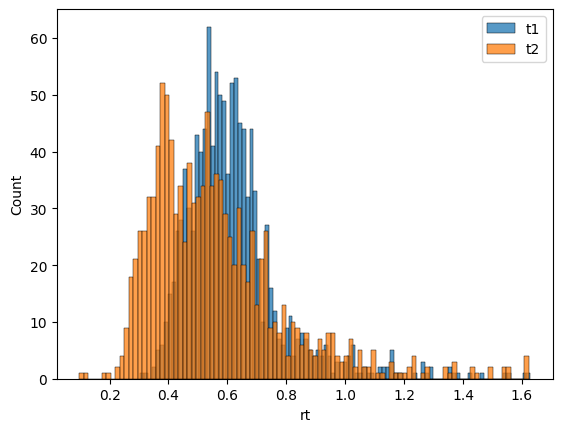

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(epochs.metadata.rt, bins=100, label='t1')
sns.histplot(epochs_t2.metadata.rt, bins=100, label='t2')
plt.legend()
plt.show()

### DEBUGGING

In [117]:
cnt = 0
for subj in subj_names:
    print(subj)
    raw = mne.io.read_raw_fif(path / f"post_ica_{subj}_raw.fif", preload=True, verbose=False)
    print(raw['stim'])
    print(raw.ch_names)
    stim_idx = raw.ch_names.index('Status')
    res = merge_events_stim(raw['Status'])
    raw._data[stim_idx] = res[0]
    print(res[0][:,414450:414480])
    print(raw['stim'][0][:,414450:414480])
    print(raw['Status'][0][:,414450:414480])
    # Consecutive? Assumes that trial onset is first, probably very unlikely that two numbers in sequence will be non-zero so doesn't matter?
    # Q LEENDERT: 
    events = mne.find_events(raw, shortest_event=1)
    events_cons = mne.find_events(raw, shortest_event=1, consecutive=True)
    events = merge_events(events)
    events_cons = merge_events(events_cons)
    # print(events[:,2][:100])
    # print(events_cons[:,2][:100])
    # print(np.unique(events[:,2], return_counts=True))
    # print(np.unique(events_cons[:,2], return_counts=True))
    
    for i in range(1, len(events)):
        if events[i-1, 2] == 64 and events[i, 2] == 64:
            print(events[i-1], events[i])
            cnt += 1
    break
    # for i in range(0, events_cons.shape[0], 100):
    #     print(i)
    #     events_subset = events[i:i+100]
    #     cons_subset = events_cons[i:i+100]
    #     if (events_subset != cons_subset).any():
    #         print(events_subset[:,2])
    #         print(cons_subset[:,2])
    #         print(events_subset[:,0])
    #         print(cons_subset[:,0])
    #         break
    
print(cnt)

VP10
(array([[65536., 65536., 65536., ...,     0.,     0.,     0.]]), array([0.00000000e+00, 1.95312500e-03, 3.90625000e-03, ...,
       3.94999414e+03, 3.94999609e+03, 3.94999805e+03]))
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'Status', 'eog_h', 'eog_v']
[[ 0.  0.  0.  0.  0. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.  1.  1.
   1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.  1.  1.
   1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.  1.  1.
   1.  1.  1.  1.  0.  0.  0.  0.  0.  0. 

In [91]:
raw['stim'][0]

array([[65536., 65536., 65536., ...,     0.,     0.,     0.]])

In [97]:
raw['stim'][0][:,414450:414480]

array([[ 0.,  0.,  0.,  0.,  0., 64., 64., 64., 64., 64., 64., 67., 67.,
        67., 67., 67.,  3.,  3.,  3.,  3.,  3.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]])

244 TOTAL occurences where 64 follows 64, 153 if consecutive='increasing' (stim t2), what does this mean?
Likely cases where 64 is followed by not 64 (but a value that is corrected to 64 in merge_events)
solution: merge_events BEFORE find_events

1/2/3 + = 14.392 (all responses t1)
4/5 + = 14.529 (all responses t2)
6 = new block?
11/12/21/22/31/32 += stim t1
130/129/128/67/66/64 (should be 64/128, failure when transmitting int?) = stim t2
16: fixation cross
Normal trial = 16-11-64-1-4/16-11-1-64-4
ALWAYS 16 (fixation) 11 (stim t1) > 1 (resp t1) OR 64 (stim t2) > 4
Not all response events were recorded, participant was too slow? Should not count trials where this is the case

In [33]:
raw['Status'][0]

array([[65536., 65536., 65536., ...,     0.,     0.,     0.]])

In [49]:
raw.info

Measurement date,"November 28, 2016 15:09:22 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 1 Stimulus, 2 EOG"
Bad channels,None
EOG channels,"eog_h, eog_v"
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,100.00 Hz


In [40]:
np.unique(raw['Status'][0].astype(int), return_counts=True)
# 1/2/3 + = 14.392 (all responses t1)
# 4/5 + = 14.529 (all responses t2)
# 6 = new block?
# 11/12/21/22/31/32 += stim t1
# 130/129/128/67/66/64 (should be 64/128, failure when transmitting int?) = stim t2
# 16: fixation cross

(array([    0,     1,     2,     3,     4,     5,     6,    11,    12,
           16,    21,    22,    31,    32,    64,    66,    67,   128,
          129,   130, 65536]),
 array([1949969,    4647,    4990,    4755,    7263,    7266,     143,
           2451,    2384,   14466,    2394,    2418,    2395,    2418,
           7174,       6,       5,    7115,      15,       6,     120],
       dtype=int64))

In [52]:
raw.info

Measurement date,"November 28, 2016 15:09:22 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,67 points
Good channels,"64 EEG, 1 Stimulus, 2 EOG"
Bad channels,None
EOG channels,"eog_h, eog_v"
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.00 Hz
Lowpass,100.00 Hz


In [ ]:
tmin = -0.25
tmax = 2

for subj in subj_names:
    # Skip those subjects because the data is not valid
    if subj == 'VP6' or subj == 'VP7':
        continue

    raw = mne.io.read_raw_fif(path+"Post ICA/post_ica_%s_raw.fif"%subj, preload=True)
    # epoch = mne.read_epochs(epoch_data_path+subj+'.fif')

    # ================= STIMULUS 1 =================
    epochs, events = create_epochs_t1(tmin, tmax, raw)
    epochs = autoreject(epochs, raw)
    epochs.save(path+'Stimlocked_fixed_index/%s_epo_t1.fif'%subj, overwrite=True)

    # # ================= STIMULUS 2 =================
    epochs, events = create_epochs_t2(tmin, tmax, raw)
    epochs = autoreject(epochs, raw)
    epochs.save(path+'Stimlocked_fixed_index/%s_epo_t2.fif'%subj, overwrite=True)

    # ================= WHOLE TRIALS =================
    # epochs, events = create_epochs_trial(tmin, tmax, raw)
    # epochs = autoreject(epochs, raw)
    # epochs.save(path+'Stimlocked_fixed_index/%s_epo_trial.fif'%subj, overwrite=True)